<a href="https://colab.research.google.com/github/xixilili/MSDS_458_Public/blob/master/MSDS458_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.4 Fourth Research/Programming Assignment (Deep Learning Option)

### Load Package

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import datetime
import time
import numpy as np
import pandas as pd
from packaging import version
from collections import Counter

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

### Load data

explore number class 1/0
https://www.kaggle.com/yasinsoylu123/cancer-detection-cnn 

load and process data
https://www.kaggle.com/mohamedhanyyy/breast-cancer-image-classification-for-beginners 

In [ ]:
from glob import glob

imagePatches = glob('/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1701_y2451_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1751_y851_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1751_y2251_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1201_y1551_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1801_y101_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1551_y2101_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1901_y1701_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1701_y601_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1551_y1051_class0.png
/content/gdrive/My Drive/Colab Notebooks/IDC_regular_ps50_idx5/9036/0/9036_i

In [ ]:
# Two arrays holding images by class type

class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [ ]:
print(len(class0))
print(len(class1))
#198738, 78786

198738
78807


In [ ]:
#import random
#sampled_class0 = random.sample(class0, 78807)
#sampled_class1 = random.sample(class1, 78807)
#len(sampled_class0)

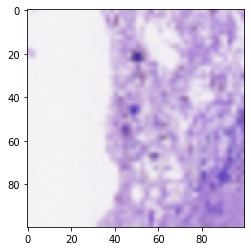

In [ ]:
import cv2
import matplotlib.pyplot as plt
for i in imagePatches[:1]:
    img=cv2.imread(i)
    img_1=cv2.resize(img,(100,100))
    plt.imshow(img_1,cmap='binary')
    plt.show()

In [ ]:
images=[]
labels=[]
for i in imagePatches[:15000]:  #use the first 15000 
    if i.endswith('.png'):
        label=int(i[-5])  #fifth letter from the right
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [ ]:
class0 =[]
class1 =[]
other = []
for y in labels:
    if y==0:
      class0.append(y)
    if y==1:
      class1.append(y)
    else:
       other.append(y) 
print(len(class0))      
print(len(class1))    

11815
3185


In [ ]:
"""
for i in imagePatches[-1500:]:  #use the last 15000 [262545:]
    if i.endswith("class0.png"):
        label=int(i[-5])  #fifth letter from the right
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [ ]:
import pickle
with open('/content/gdrive/My Drive/Colab Notebooks/file_images.pkl', 'wb') as file:     
  pickle.dump(images, file)

with open('/content/gdrive/My Drive/Colab Notebooks/file_labels.pkl', 'wb') as file:     
  pickle.dump(labels, file)    

In [ ]:
"""
# load imaging and label data
import pickle

with open('/content/gdrive/My Drive/Colab Notebooks/file_images.pkl', 'rb') as file:     
    images = pickle.load(file)

with open('/content/gdrive/My Drive/Colab Notebooks/file_labels.pkl', 'rb') as file:     
    labels = pickle.load(file)    
"""    

"\n# load imaging and label data\nimport pickle\n\nwith open('/content/gdrive/My Drive/Colab Notebooks/file_images.pkl', 'rb') as file:     \n    images = pickle.load(file)\n\nwith open('/content/gdrive/My Drive/Colab Notebooks/file_labels.pkl', 'rb') as file:     \n    labels = pickle.load(file)    \n"

In [ ]:
print(len(images))
print(len(labels))

15000
15000


In [ ]:
class0 =[]
class1 =[]
other = []
for y in labels:
    if y==0:
      class0.append(y)
    if y==1:
      class1.append(y)
    else:
       other.append(y) 
print(len(class0))      
print(len(class1))    

11815
3185


### Split dataset

In [ ]:
# normalize input data
x=np.stack(images)
x=x/255 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,labels,random_state=0,test_size=0.2)
x_train_split,x_validate_split,y_train_split,y_validate_split=train_test_split(x_train,y_train,random_state=0,test_size=0.2)

In [ ]:
"""
import pickle
with open('file_x_train_split.pkl', 'wb') as file:     
  pickle.dump(x_train_split, file)

with open('file_y_train_split.pkl', 'wb') as file:     
  pickle.dump(y_train_split, file)   

with open('file_x_validate_split.pkl', 'wb') as file:     
  pickle.dump(x_validate_split, file)   

with open('file_y_validate_split.pkl', 'wb') as file:     
  pickle.dump(y_validate_split, file)  

with open('file_x_test.pkl', 'wb') as file:     
  pickle.dump(x_test, file)   

with open('file_y_test.pkl', 'wb') as file:     
  pickle.dump(y_test, file)  
"""  

In [ ]:
"""
# alternate way to split dataset
x_train = x[:int(len(x)*.8)]
y_train = labels[:int(len(labels)*.8)]
x_test = x[int(len(x)*.8):]
y_test = labels[int(len(labels)*.8):]

x_train_split = x_train[:int(len(x_train)*.8)]
y_train_split = y_train[:int(len(y_train)*.8)]
x_validate_split = x_train[int(len(x_train)*.8):]
y_validate_split = y_train[int(len(y_train)*.8):]
"""

In [ ]:
# load train validate and test data set
import pickle

with open('/content/gdrive/My Drive/Colab Notebooks/file_x_train_split.pkl', 'rb') as file:     
    x_train_split = pickle.load(file)

with open('/content/gdrive/My Drive/Colab Notebooks/file_y_train_split.pkl', 'rb') as file:     
    y_train_split = pickle.load(file)   

with open('/content/gdrive/My Drive/Colab Notebooks/file_x_validate_split.pkl', 'rb') as file:     
    x_validate_split = pickle.load(file)

with open('/content/gdrive/My Drive/Colab Notebooks/file_y_validate_split.pkl', 'rb') as file:     
    y_validate_split = pickle.load(file)  

with open('/content/gdrive/My Drive/Colab Notebooks/file_x_test.pkl', 'rb') as file:     
    x_test = pickle.load(file)

with open('/content/gdrive/My Drive/Colab Notebooks/file_y_test.pkl', 'rb') as file:     
    y_test = pickle.load(file)  


In [ ]:
# one-hot code labels
from tensorflow.keras.utils import to_categorical

#y=to_categorical(labels)
y_train_split_onehot = to_categorical(y_train_split)
y_validate_split_onehot = to_categorical(y_validate_split)
y_test_onehot = to_categorical(y_test)

In [ ]:
print(x_train_split.shape, x_validate_split.shape, x_test.shape)

(9600, 100, 100, 3) (2400, 100, 100, 3) (3000, 100, 100, 3)


In [ ]:
print(y_train_split_onehot.shape, y_validate_split_onehot.shape, y_test_onehot.shape)

(9600, 2) (2400, 2) (3000, 2)


In [ ]:
class0 =[]
class1 =[]
for y in y_train_split:
    if y==0:
      class0.append(y)
    else:
      class1.append(y)
print(len(class0))      
print(len(class1))    

7559
2041


In [ ]:
class0 =[]
class1 =[]
for y in y_validate_split:
    if y==0:
      class0.append(y)
    else:
      class1.append(y)
print(len(class0))      
print(len(class1))    

1887
513


In [ ]:
class0 =[]
class1 =[]
for y in y_test:
    if y==0:
      class0.append(y)
    else:
      class1.append(y)
print(len(class0))      
print(len(class1))    

2369
631


### Functions

In [ ]:
def namestr(obj, namespace):
  for name in namespace:
    if namespace[name] is obj:
      return name

In [ ]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(y_test, predictions)))) 

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [ ]:
import datetime as dt

def compile_train_plot_model(model, epoch, batch):
  #plot model
  keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

  #compile model
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  start_datetime = dt.datetime.now()

  #train model
  history = model.fit(x_train_split
                      ,y_train_split_onehot
                      ,epochs=epoch
                      ,batch_size=batch
                      ,validation_data=(x_validate_split, y_validate_split_onehot)
                      #,callbacks=[
                      #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                      #tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                      #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                    )

  #evaluate model
  loss, accuracy = model.evaluate(x_test, y_test_onehot)
  print('test set accuracy: ', accuracy * 100)

  #predict model
  preds = model.predict(x_test)

  runtime = (dt.datetime.now() - start_datetime).total_seconds()

  #training and validation performance metrix
  history_dict = history.history
  history_df=pd.DataFrame(history_dict)

  result = history_df.tail(1)
  result['test_loss'] = loss
  result['test_accuracy'] = accuracy
  result['process_time'] = runtime
  result['epochs'] = epoch  
  result['batch_size'] = batch    

  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  #loss and accuracy for training and validation data
  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
      plt.subplot(1, 2, i + 1)
      plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
      plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
      plt.legend()
      plt.title('{0} with {1} epochs and {2} batch size'.format(namestr(model, globals()), epoch, batch))          
  plt.show()                        

  #confuison matrix
  pred1= model.predict(x_test)
  pred1=np.argmax(pred1, axis=1)
  print_validation_report(y_test, pred1)
  plot_confusion_matrix(y_test,pred1)

  return result

In [ ]:
import datetime as dt

def compile_train_model_with_reg(model, epoch, batch):
  #plot model
  keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

  #compile model
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  start_datetime = dt.datetime.now()

  #train model
  history = model.fit(x_train_split
                      ,y_train_split_onehot
                      ,epochs=epoch
                      ,batch_size=batch
                      ,validation_data=(x_validate_split, y_validate_split_onehot)
                      ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]                                                                                                     
                    )

  #evaluate model
  loss, accuracy = model.evaluate(x_test, y_test_onehot)
  print('test set accuracy: ', accuracy * 100)

  #predict model
  preds = model.predict(x_test)

  runtime = (dt.datetime.now() - start_datetime).total_seconds()

  #training and validation performance metrix
  history_dict = history.history
  history_df=pd.DataFrame(history_dict)

  result = history_df.tail(1)
  result['test_loss'] = loss
  result['test_accuracy'] = accuracy
  result['process_time'] = runtime
  result['epochs'] = epoch  
  result['batch_size'] = batch    

  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  #loss and accuracy for training and validation data
  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
      plt.subplot(1, 2, i + 1)
      plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
      plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
      plt.legend()
      plt.title('{0} with {1} epochs and {2} batch size'.format(namestr(model, globals()), epoch, batch))          
  plt.show()                        

  #confuison matrix
  pred1= model.predict(x_test)
  pred1=np.argmax(pred1, axis=1)
  print_validation_report(y_test, pred1)
  plot_confusion_matrix(y_test,pred1)

  return result

### Common-sense Model

Since the patients had been requested for surgical pathology test, they should have other medical conditions bring up to the concern of Invasive ductal carcinoma. So we assume every images is positive (has Invasive ductal carcinoma). There are 631 out of 631+2369 postive images in the test data set. So the accuracy is 21%

### Non-Machine Learning Model

For the keeping things simple, we are going to use Logistic Regression for image classification. 

In [ ]:
# Reshape the images:
x_train_reshaped = np.reshape(x_train_split, (9600, 30000))
x_test_reshaped = np.reshape(x_test, (3000, 30000))


In [ ]:
from sklearn.linear_model import LogisticRegression
model0 = LogisticRegression().fit(x_train_reshaped, y_train_split)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
score = model0.score(x_test_reshaped, y_test)
print(score)

0.787


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2369
           1       0.49      0.32      0.39       631

    accuracy                           0.79      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.79      0.77      3000

Accuracy Score: 0.787
Root Mean Square Error: 0.46151923036857306


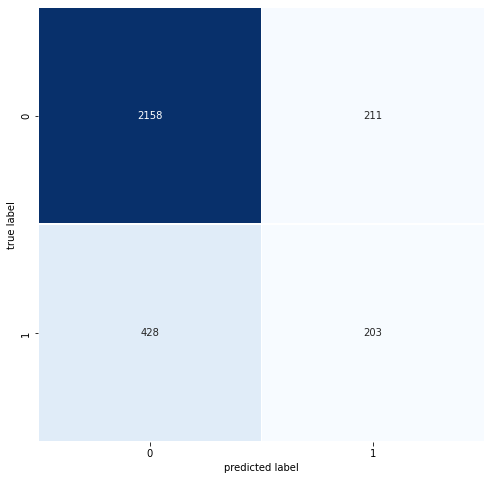

In [ ]:
#confuison matrix
preds = model0.predict(x_test_reshaped)
print_validation_report(y_test, preds)
plot_confusion_matrix(y_test,preds)

### DNN with 2 layers (no regularization)

In [ ]:
model1 = models.Sequential()
model1.add(layers.InputLayer(input_shape=(100, 100, 3)))
model1.add(layers.Flatten(name ='flatten'))
model1.add(layers.Dense(name = "hidden_layer",units=384, activation=tf.nn.relu))
model1.add(layers.Dense(name = "hidden_layer2",units=384, activation=tf.nn.relu))
model1.add(layers.Dense(name = "output_layer",units=2, activation=tf.nn.softmax))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 hidden_layer (Dense)        (None, 384)               11520384  
                                                                 
 hidden_layer2 (Dense)       (None, 384)               147840    
                                                                 
 output_layer (Dense)        (None, 2)                 770       
                                                                 
Total params: 11,668,994
Trainable params: 11,668,994
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
96/96 [==============================] - 17s 172ms/step - loss: 2.9561 - accuracy: 0.6854 - val_loss: 0.6520 - val_accuracy: 0.7862
Epoch 2/20
96/96 [==============================] - 16s 171ms/step - loss: 0.4989 - accuracy: 0.7857 - val_loss: 0.4978 - val_accuracy: 0.7862
Epoch 3/20
96/96 [==============================] - 16s 162ms/step - loss: 0.4797 - accuracy: 0.7936 - val_loss: 0.5492 - val_accuracy: 0.7862
Epoch 4/20
96/96 [==============================] - 16s 162ms/step - loss: 0.4659 - accuracy: 0.8030 - val_loss: 0.4602 - val_accuracy: 0.7971
Epoch 5/20
96/96 [==============================] - 16s 162ms/step - loss: 0.4760 - accuracy: 0.8014 - val_loss: 0.4321 - val_accuracy: 0.8154
Epoch 6/20
96/96 [==============================] - 16s 163ms/step - loss: 0.4603 - accuracy: 0.8056 - val_loss: 0.4356 - val_accuracy: 0.8096
Epoch 7/20
96/96 [==============================] - 16s 163ms/step - loss: 0.4722 - accuracy: 0.8010 - val_loss: 0.4444 - val_accuracy: 0.8100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

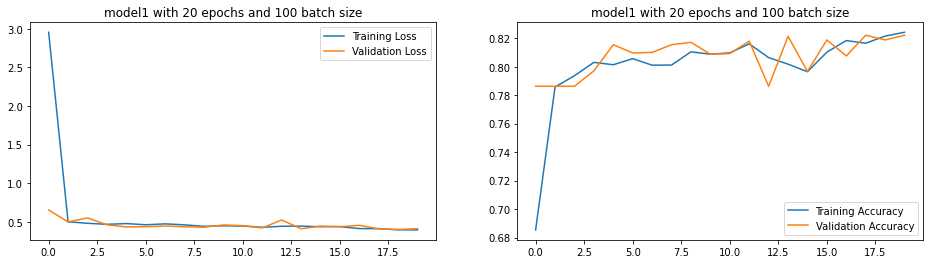

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2369
           1       0.71      0.37      0.49       631

    accuracy                           0.84      3000
   macro avg       0.78      0.67      0.70      3000
weighted avg       0.82      0.84      0.82      3000

Accuracy Score: 0.8363333333333334
Root Mean Square Error: 0.4045573712919673


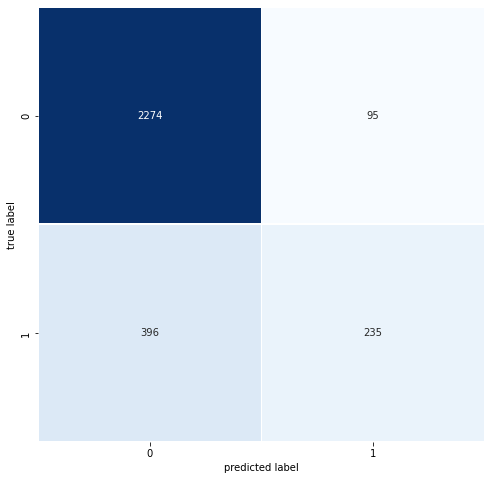

In [ ]:
result1 = compile_train_plot_model(model1, 20, 100)

In [ ]:
assignment_result_table = result1
new_col = ['DNN with 2 layers (no regularization)']   
assignment_result_table.insert(loc=0, column='Model', value=new_col)
assignment_result_table

,Model,loss,accuracy,val_loss,val_accuracy,test_loss,test_accuracy,process_time,epochs,batch_size
19,DNN with 2 layers (no regularization),0.393726,0.824167,0.409517,0.822083,0.398782,0.836333,331.492346,20,100


### CNN with 2 convolution/max pooling layers (no regularization)

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(100, 100, 3)))
model3.add(layers.MaxPool2D((2, 2),strides=2))
model3.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model3.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model3.add(layers.Flatten())
model3.add(layers.Dense(units=384, activation=tf.nn.relu))
model3.add(layers.Dense(units=2, activation=tf.nn.softmax))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 256)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                                 
 dense (Dense)               (None, 384)              

Epoch 1/20
96/96 [==============================] - 1003s 10s/step - loss: 0.6232 - accuracy: 0.8150 - val_loss: 0.3252 - val_accuracy: 0.8687
Epoch 2/20
96/96 [==============================] - 1011s 11s/step - loss: 0.3354 - accuracy: 0.8549 - val_loss: 0.3268 - val_accuracy: 0.8687
Epoch 3/20
96/96 [==============================] - 1005s 10s/step - loss: 0.3126 - accuracy: 0.8754 - val_loss: 0.3010 - val_accuracy: 0.8854
Epoch 4/20
96/96 [==============================] - 1000s 10s/step - loss: 0.3128 - accuracy: 0.8697 - val_loss: 0.3469 - val_accuracy: 0.8504
Epoch 5/20
96/96 [==============================] - 1003s 10s/step - loss: 0.3052 - accuracy: 0.8697 - val_loss: 0.2929 - val_accuracy: 0.8754
Epoch 6/20
96/96 [==============================] - 999s 10s/step - loss: 0.3038 - accuracy: 0.8731 - val_loss: 0.3145 - val_accuracy: 0.8717
Epoch 7/20
96/96 [==============================] - 999s 10s/step - loss: 0.2961 - accuracy: 0.8753 - val_loss: 0.3919 - val_accuracy: 0.8313
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

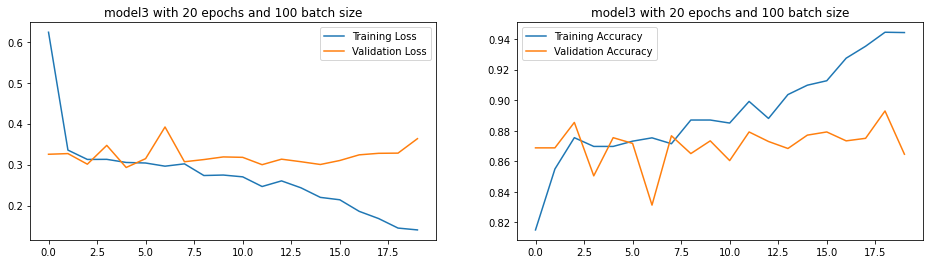

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2369
           1       0.75      0.62      0.68       631

    accuracy                           0.88      3000
   macro avg       0.83      0.78      0.80      3000
weighted avg       0.87      0.88      0.87      3000

Accuracy Score: 0.8776666666666667
Root Mean Square Error: 0.3497618237219913


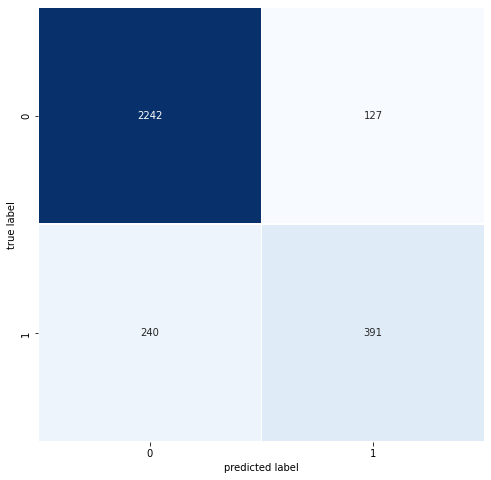

In [ ]:
result3 = compile_train_plot_model(model3, 20, 100)

In [ ]:
new_col = ['CNN with 2 convolution/max pooling layers (no regularization)']   
result3.insert(loc=0, column='Model', value=new_col)

assignment_result_table = assignment_result_table.append(result3, ignore_index = True)

assignment_result_table

,Model,loss,accuracy,val_loss,val_accuracy,test_loss,test_accuracy,process_time,epochs,batch_size
0,DNN with 2 layers (no regularization),0.393726,0.824167,0.409517,0.822083,0.398782,0.836333,331.492346,20,100
1,CNN with 2 convolution/max pooling layers (no ...,0.140416,0.944271,0.363302,0.864583,0.341417,0.877667,20179.840585,20,100


### CNN with 3 convolution/max pooling layers (no regularization)

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(100, 100, 3)))
model4.add(layers.MaxPool2D((2, 2),strides=2))
model4.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4.add(layers.Flatten())
model4.add(layers.Dense(units=384, activation=tf.nn.relu))
model4.add(layers.Dense(units=2, activation=tf.nn.softmax))

model4.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 512)       1180160   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 512)     

Epoch 1/20
96/96 [==============================] - 1378s 14s/step - loss: 0.4605 - accuracy: 0.7957 - val_loss: 0.4442 - val_accuracy: 0.7908
Epoch 2/20
96/96 [==============================] - 1369s 14s/step - loss: 0.3580 - accuracy: 0.8424 - val_loss: 0.3871 - val_accuracy: 0.8354
Epoch 3/20
96/96 [==============================] - 1362s 14s/step - loss: 0.3400 - accuracy: 0.8565 - val_loss: 0.3080 - val_accuracy: 0.8813
Epoch 4/20
96/96 [==============================] - 1356s 14s/step - loss: 0.3270 - accuracy: 0.8598 - val_loss: 0.3092 - val_accuracy: 0.8808
Epoch 5/20
96/96 [==============================] - 1359s 14s/step - loss: 0.3201 - accuracy: 0.8664 - val_loss: 0.2961 - val_accuracy: 0.8925
Epoch 6/20
96/96 [==============================] - 1359s 14s/step - loss: 0.3045 - accuracy: 0.8731 - val_loss: 0.3027 - val_accuracy: 0.8708
Epoch 7/20
96/96 [==============================] - 1359s 14s/step - loss: 0.2810 - accuracy: 0.8857 - val_loss: 0.2927 - val_accuracy: 0.8829

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

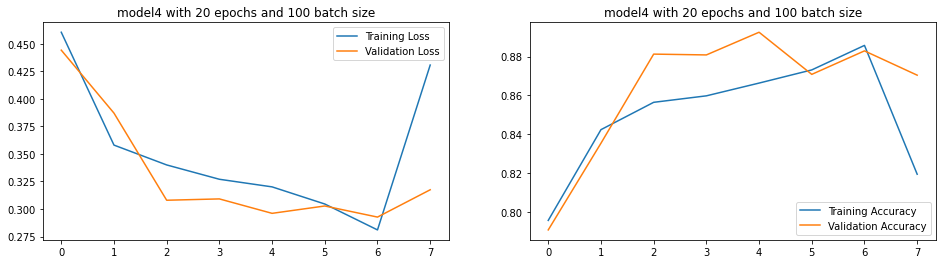

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2369
           1       0.86      0.46      0.60       631

    accuracy                           0.87      3000
   macro avg       0.86      0.72      0.76      3000
weighted avg       0.87      0.87      0.85      3000

Accuracy Score: 0.8696666666666667
Root Mean Square Error: 0.36101708177499486


,Unnamed: 0,Model,loss,accuracy,val_loss,val_accuracy,test_loss,test_accuracy,process_time,epochs,batch_size
0,0.0,DNN with 2 layers (no regularization),0.393726,0.824167,0.409517,0.822083,0.398782,0.836333,331.492346,20,100
1,1.0,CNN with 2 convolution/max pooling layers (no ...,0.140416,0.944271,0.363302,0.864583,0.341417,0.877667,20179.840590,20,100
2,NaN,CNN with 3 convolution/max pooling layers (wit...,0.594159,0.872604,2.142269,0.244167,2.157205,0.237000,8921.888941,20,100
3,NaN,CNN with 3 convolution/max pooling layers (no ...,0.430689,0.819479,0.317468,0.870417,0.313383,0.869667,11150.180596,20,100


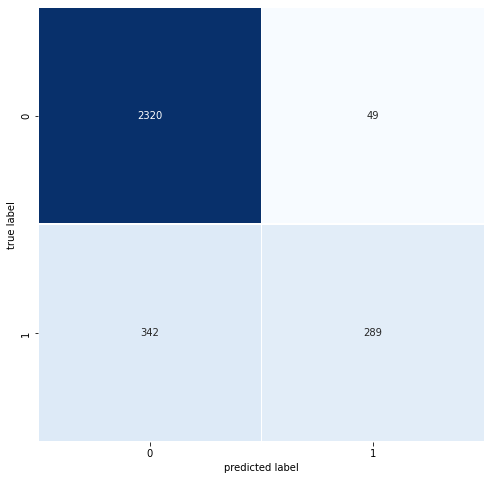

In [ ]:
result4 = compile_train_model_with_reg(model4, 20, 100)

new_col = ['CNN with 3 convolution/max pooling layers (no regularization)']   
result4.insert(loc=0, column='Model', value=new_col)
assignment_result_table = assignment_result_table.append(result4, ignore_index = True)
assignment_result_table

## CNN with regularization 


In [ ]:
model4_reg = models.Sequential()
model4_reg.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(100, 100, 3)))
model4_reg.add(layers.MaxPool2D((2, 2),strides=2))
model4_reg.add(layers.Dropout(0.3))
model4_reg.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4_reg.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4_reg.add(layers.Dropout(0.3))
model4_reg.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4_reg.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4_reg.add(layers.Dropout(0.3))
model4_reg.add(layers.Flatten())
#model4_reg.add(layers.BatchNormalization())
model4_reg.add(layers.Dense(units=384, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model4_reg.add(layers.Dense(units=2, activation=tf.nn.softmax))

model4_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 256)       0

Epoch 1/20
96/96 [==============================] - 1429s 15s/step - loss: 1.1285 - accuracy: 0.7731 - val_loss: 0.6846 - val_accuracy: 0.8467
Epoch 2/20
96/96 [==============================] - 1422s 15s/step - loss: 0.5046 - accuracy: 0.8233 - val_loss: 0.4262 - val_accuracy: 0.8325
Epoch 3/20
96/96 [==============================] - 1434s 15s/step - loss: 0.4133 - accuracy: 0.8452 - val_loss: 0.4098 - val_accuracy: 0.8671
Epoch 4/20
96/96 [==============================] - 1425s 15s/step - loss: 0.3682 - accuracy: 0.8579 - val_loss: 0.3479 - val_accuracy: 0.8658
Epoch 5/20
96/96 [==============================] - 1417s 15s/step - loss: 0.3529 - accuracy: 0.8586 - val_loss: 0.3552 - val_accuracy: 0.8487
Epoch 6/20
94/94 [==============================] - 117s 1s/step - loss: 0.3529 - accuracy: 0.8583
test set accuracy:  85.83333492279053


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

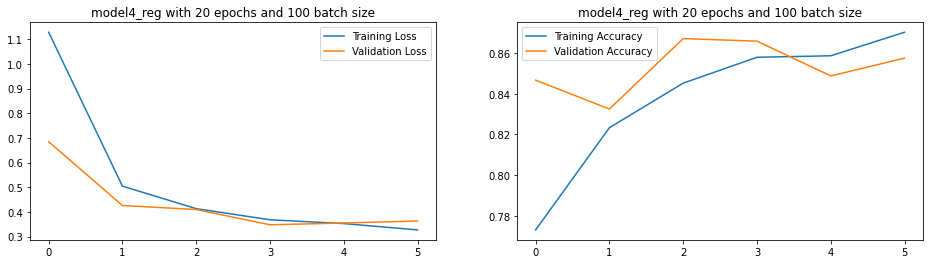

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2369
           1       0.63      0.80      0.70       631

    accuracy                           0.86      3000
   macro avg       0.79      0.84      0.80      3000
weighted avg       0.88      0.86      0.86      3000

Accuracy Score: 0.8583333333333333
Root Mean Square Error: 0.3763863263545405


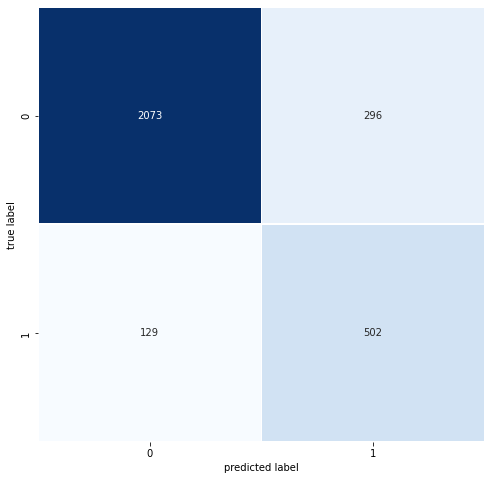

In [ ]:
result4_reg = compile_train_model_with_reg(model4_reg, 20, 100)

In [ ]:
assignment_result_table= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/assignment4_result.csv')

In [ ]:
new_col = ['CNN with 3 convolution/max pooling layers (with regularization)2']   
result4_reg.insert(loc=0, column='Model', value=new_col)
assignment_result_table = assignment_result_table.append(result4_reg, ignore_index = True)
assignment_result_table

,Unnamed: 0,Unnamed: 0.1,Model,loss,accuracy,val_loss,val_accuracy,test_loss,test_accuracy,process_time,epochs,batch_size
0,0.0,0.0,DNN with 2 layers (no regularization),0.393726,0.824167,0.409517,0.822083,0.398782,0.836333,331.492346,20,100
1,1.0,1.0,CNN with 2 convolution/max pooling layers (no ...,0.140416,0.944271,0.363302,0.864583,0.341417,0.877667,20179.840590,20,100
2,2.0,NaN,CNN with 3 convolution/max pooling layers (wit...,0.594159,0.872604,2.142269,0.244167,2.157205,0.237000,8921.888941,20,100
3,3.0,NaN,CNN with 3 convolution/max pooling layers (no ...,0.430689,0.819479,0.317468,0.870417,0.313383,0.869667,11150.180596,20,100
4,NaN,NaN,CNN with 3 convolution/max pooling layers (wit...,0.327179,0.870208,0.363175,0.857500,0.352894,0.858333,8796.981802,20,100


In [ ]:
assignment_result_table.to_csv('/content/gdrive/My Drive/Colab Notebooks/assignment4_result.csv')